In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
import warnings

warnings.filterwarnings('ignore')

# loading Dataset

In [3]:
data = pd.read_excel("flight_data.xlsx")

In [4]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
data.dropna(inplace=True)

In [8]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [9]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [10]:
data[["dep_hr","dep_min"]]=data["Dep_Time"].str.split(":",expand=True)

In [11]:
data["Arr_hour"]=pd.to_datetime(data["Arrival_Time"]).dt.hour
data["Arr_min"]=pd.to_datetime(data["Arrival_Time"]).dt.minute

Making separate column for hour and min and extracting it from duration

In [12]:
duration = list(data["Duration"])

In [13]:
duration_hour= [int(x.split('h')[0].strip()) if "h" in x else 0 for x in data["Duration"]]
duration_min= [int(x.split('m')[0].split()[-1].strip()) if "m" in x else 0 for x in data["Duration"]]

In [14]:
data["dur_hr"] = duration_hour
data["dur_min"]=duration_min

In [15]:
data=data.drop(columns=["Route","Date_of_Journey","Dep_Time","Arrival_Time","Additional_Info","Duration"],axis=1)

In [16]:
data['Total_Stops'].value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

In [17]:
data.replace({"non-stop":0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)

In [18]:
data.head()

,Airline,Source,Destination,Total_Stops,Price,dep_hr,dep_min,Arr_hour,Arr_min,dur_hr,dur_min
0,IndiGo,Banglore,New Delhi,0,3897,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,05,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,09,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,18,05,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,16,50,21,35,4,45


# EDA

<Axes: ylabel='Airline'>

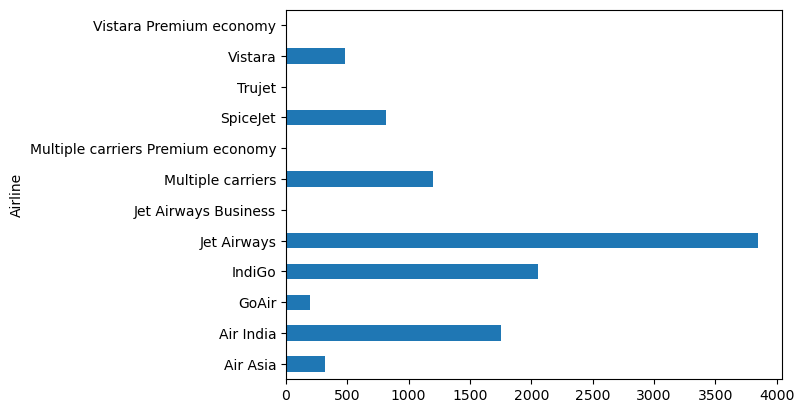

In [19]:
data.groupby("Airline").size().plot(kind="barh")

<Axes: ylabel='Source'>

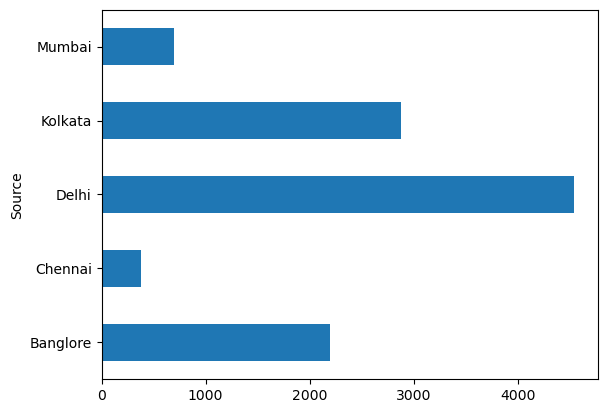

In [20]:
data.groupby("Source").size().plot(kind="barh")

<Axes: ylabel='Destination'>

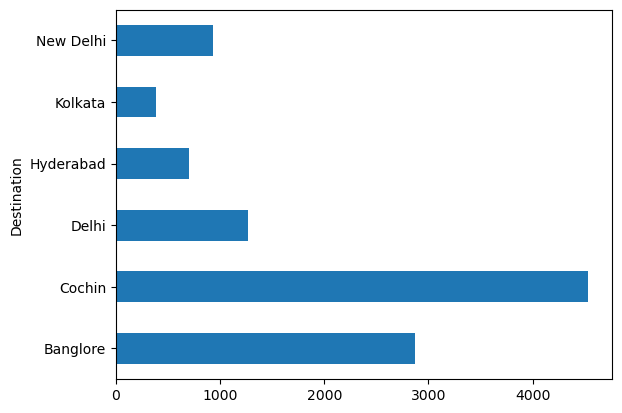

In [21]:
data.groupby("Destination").size().plot(kind="barh")

<Axes: xlabel='Airline', ylabel='Price'>

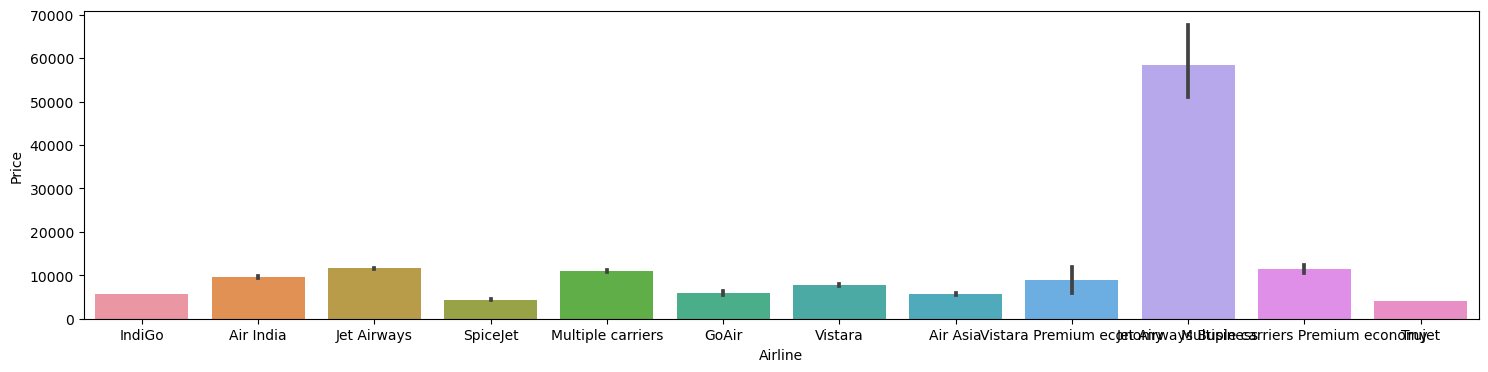

In [22]:
plt.figure(figsize=(18,4))
sns.barplot(x='Airline',y='Price', data=data)


<Axes: ylabel='Total_Stops'>

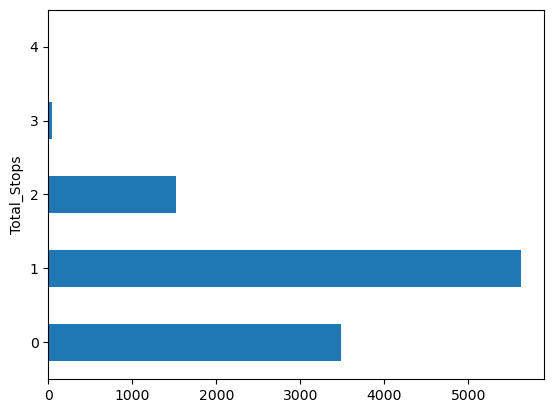

In [23]:
data.groupby('Total_Stops').size().plot(kind='barh')

# Encoding

In [24]:
data.head()

,Airline,Source,Destination,Total_Stops,Price,dep_hr,dep_min,Arr_hour,Arr_min,dur_hr,dur_min
0,IndiGo,Banglore,New Delhi,0,3897,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,05,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,09,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,18,05,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,16,50,21,35,4,45


In [25]:
airline=data[["Airline"]]
a_r=pd.get_dummies(airline,drop_first=True)

In [26]:
so = data[['Source']]
s_d = pd.get_dummies(so,drop_first=True)

In [27]:
de=data[["Destination"]]
a_d = pd.get_dummies(de,drop_first=True)

In [28]:
s_d

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,False,False,False,False
1,False,False,True,False
2,False,True,False,False
3,False,False,True,False
4,False,False,False,False
...,...,...,...,...
10678,False,False,True,False
10679,False,False,True,False
10680,False,False,False,False
10681,False,False,False,False


In [29]:
e_d = pd.concat([data,a_r,s_d,a_d],axis=1)

In [30]:
e_d.shape

(10682, 31)

In [31]:
e_d.head()

,Airline,Source,Destination,Total_Stops,Price,dep_hr,dep_min,Arr_hour,Arr_min,dur_hr,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,22,20,1,10,2,...,False,False,False,False,False,False,False,False,False,True
1,Air India,Kolkata,Banglore,2,7662,05,50,13,15,7,...,False,False,False,True,False,False,False,False,False,False
2,Jet Airways,Delhi,Cochin,2,13882,09,25,4,25,19,...,False,False,True,False,False,True,False,False,False,False
3,IndiGo,Kolkata,Banglore,1,6218,18,05,23,30,5,...,False,False,False,True,False,False,False,False,False,False
4,IndiGo,Banglore,New Delhi,1,13302,16,50,21,35,4,...,False,False,False,False,False,False,False,False,False,True


In [32]:
e_d.drop(['Airline','Source','Destination'],axis=1,inplace=True)

In [33]:
e_d.head()

,Total_Stops,Price,dep_hr,dep_min,Arr_hour,Arr_min,dur_hr,dur_min,Airline_Air India,Airline_GoAir,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,22,20,1,10,2,50,False,False,...,False,False,False,False,False,False,False,False,False,True
1,2,7662,05,50,13,15,7,25,True,False,...,False,False,False,True,False,False,False,False,False,False
2,2,13882,09,25,4,25,19,0,False,False,...,False,False,True,False,False,True,False,False,False,False
3,1,6218,18,05,23,30,5,25,False,False,...,False,False,False,True,False,False,False,False,False,False
4,1,13302,16,50,21,35,4,45,False,False,...,False,False,False,False,False,False,False,False,False,True


In [34]:
x=e_d.drop("Price",axis=1)
y = e_d['Price']

In [35]:
x.shape

(10682, 27)

Feature Selection using GradientBoostingRegressor


In [36]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(x,y)
print(gb.feature_importances_)

[6.13750144e-02 1.02911967e-02 7.68376635e-03 1.87524577e-02
 1.34640565e-02 5.88105813e-01 1.20458029e-03 1.82307121e-03
 3.49512915e-03 3.23417076e-02 8.97082873e-02 9.57407051e-02
 1.46863950e-02 2.32679713e-04 6.18538948e-03 0.00000000e+00
 1.70450723e-03 6.17524302e-05 0.00000000e+00 1.18798832e-04
 4.08857903e-03 3.68448701e-03 3.40769657e-04 9.18079888e-05
 5.42597560e-03 5.20457102e-04 3.88726152e-02]


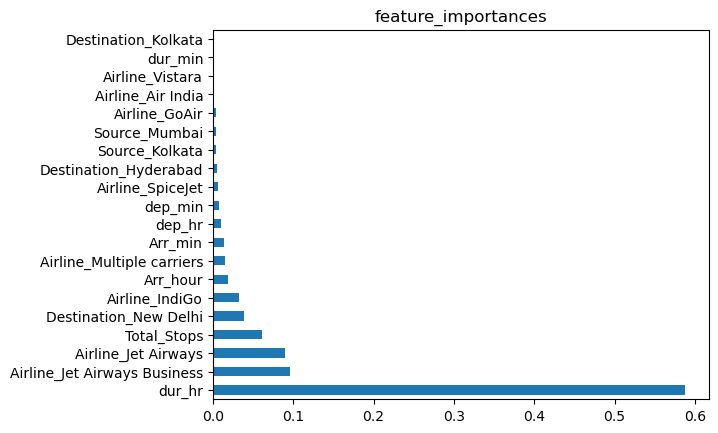

In [37]:
vis = pd.Series(gb.feature_importances_,index=x.columns)
vis.nlargest(20).plot(kind='barh')
plt.title("feature_importances")
plt.show()

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

# Feature Scaling


In [39]:
 from sklearn.preprocessing import StandardScaler # performing standardization technique
sc = StandardScaler()
x_train_sc=sc.fit_transform(x_train)
x_test_sc=sc.transform(x_test)

# linear regressor

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
model =LinearRegression()
model.fit(x_train,y_train)
pred = model.predict(x_test)
print(r2_score(y_test,pred))

0.5534647977100868


In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
model =LinearRegression()
model.fit(x_train_sc,y_train)
pred_sc = model.predict(x_test_sc)
print(r2_score(y_test,pred_sc))

0.5534260872767435


# Random Forest Regressor


In [42]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
Ra_model = RandomForestRegressor()
Ra_model.fit(x_train,y_train)
Rpred = Ra_model.predict(x_test)
print(metrics.r2_score(y_test,Rpred))

0.6187876982989375


In [43]:
from sklearn.ensemble import RandomForestRegressor
Ra_model = RandomForestRegressor()
Ra_model.fit(x_train_sc,y_train)
Rpred_sc = Ra_model.predict(x_test_sc)
print(metrics.r2_score(y_test,Rpred_sc))


0.6195957652795026


# svm

In [44]:
from sklearn.svm import SVR
s_model = SVR()
s_model.fit(x_train,y_train)
y_pred = s_model.predict(x_test)
r2_score(y_test,y_pred)

0.011373168007778656

In [45]:
from sklearn.svm import SVR
s_model = SVR()
s_model.fit(x_train_sc,y_train)
y_pred_sc = s_model.predict(x_test_sc)
r2_score(y_test,y_pred_sc)

0.07574583399455281

# KNN R

In [46]:
from sklearn.neighbors import KNeighborsRegressor
knn_classifier = KNeighborsRegressor(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_classifier.fit(x_train, y_train)
y_pred_knn = knn_classifier.predict(x_test)
r2_score(y_test, y_pred_knn)

0.5609873776996539

In [47]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_reg.fit(x_train_sc, y_train)
y_pred_knn_sc = knn_reg.predict(x_test_sc)
r2_score(y_test, y_pred_knn_sc)

0.5935242829081053

# DT

In [48]:
from sklearn.tree import DecisionTreeRegressor
d_r = DecisionTreeRegressor(criterion="squared_error",random_state=50)
d_r.fit(x_train,y_train)
y_prd_d = d_r.predict(x_test)
r2_score(y_test,y_prd_d)

0.5890658756651912

In [49]:
from sklearn.tree import DecisionTreeRegressor
d_r = DecisionTreeRegressor(criterion="squared_error",random_state=50)
d_r.fit(x_train_sc,y_train)
y_prd_d_sc = d_r.predict(x_test_sc)
r2_score(y_test,y_prd_d_sc)

0.5912756132581294